✅ Correlation between Petrol & Diesel: 0.99


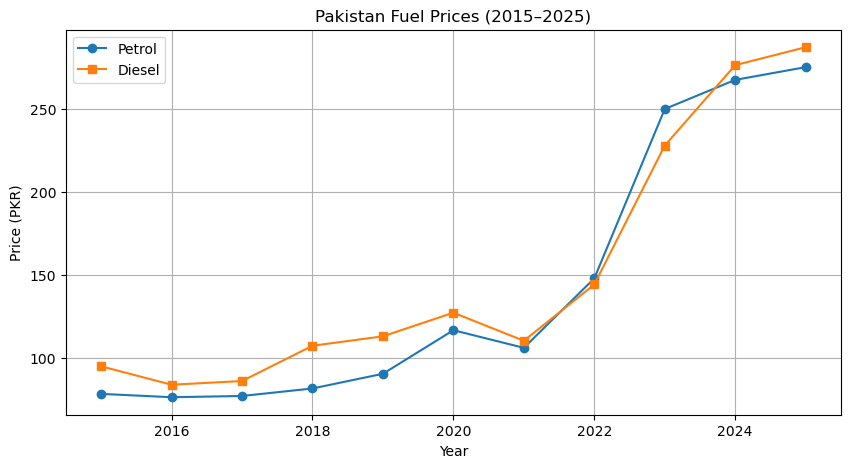

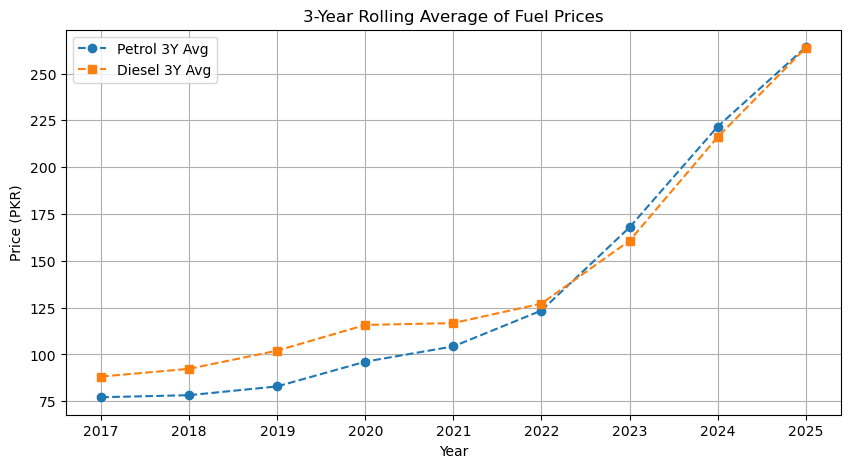

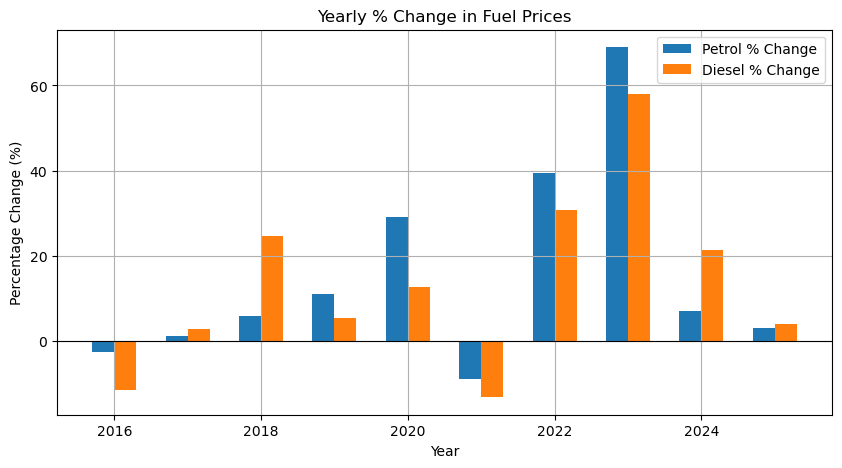

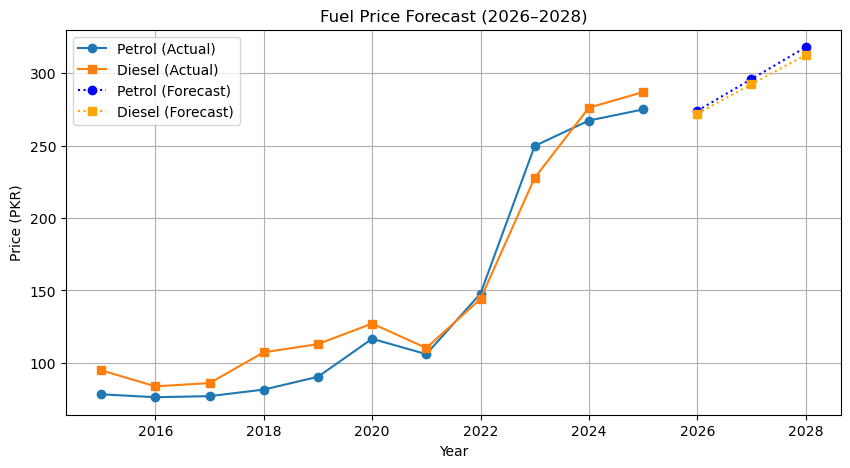

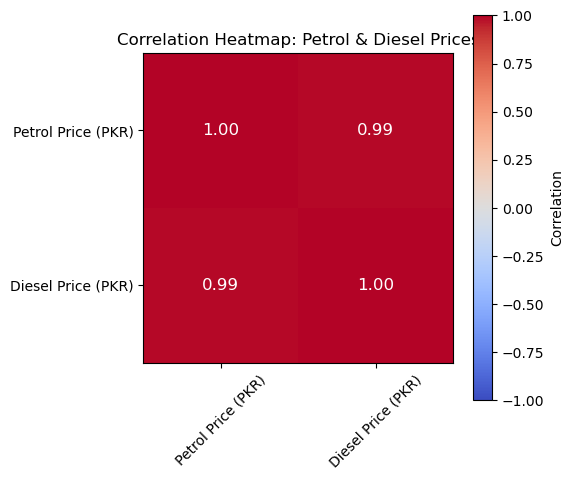

✅ Excel file saved at: C:\Users\PC LINK\project of programming for business\Pakistan_Fuel_Prices_Separate_Charts_2015_2028.xlsx


,Year,Petrol Price (PKR),Diesel Price (PKR),Petrol % Change,Diesel % Change,Petrol 3Y Avg,Diesel 3Y Avg
0,2015,78.280000,94.860000,NaN,NaN,NaN,NaN
1,2016,76.260000,83.790000,-2.580480,-11.669829,NaN,NaN
2,2017,77.010000,86.010000,0.983478,2.649481,77.183333,88.220000
3,2018,81.530000,107.250000,5.869368,24.694803,78.266667,92.350000
4,2019,90.380000,112.940000,10.854900,5.305361,82.973333,102.066667
5,2020,116.600000,127.140000,29.010843,12.573048,96.170000,115.776667
6,2021,106.000000,110.240000,-9.090909,-13.292434,104.326667,116.773333
7,2022,147.830000,144.150000,39.462264,30.760160,123.476667,127.176667
8,2023,249.800000,227.800000,68.977880,58.029830,167.876667,160.730000
9,2024,267.340000,276.210000,7.021617,21.251097,221.656667,216.053333


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


# DATA FOR YEARS 2015–2025 (Petrol & Diesel Prices in PKR)

years = np.arange(2015, 2026)
petrol_prices = [78.28, 76.26, 77.01, 81.53, 90.38, 116.6, 106, 147.83, 249.8, 267.34, 275.00]
diesel_prices = [94.86, 83.79, 86.01, 107.25, 112.94, 127.14, 110.24, 144.15, 227.8, 276.21, 287.00]


#  CREATE DATAFRAME

df = pd.DataFrame({
    "Year": years,
    "Petrol Price (PKR)": petrol_prices,
    "Diesel Price (PKR)": diesel_prices
})


#  YEARLY PERCENTAGE CHANGE

df["Petrol % Change"] = df["Petrol Price (PKR)"].pct_change() * 100
df["Diesel % Change"] = df["Diesel Price (PKR)"].pct_change() * 100


#  3-YEAR ROLLING AVERAGE

df["Petrol 3Y Avg"] = df["Petrol Price (PKR)"].rolling(window=3).mean()
df["Diesel 3Y Avg"] = df["Diesel Price (PKR)"].rolling(window=3).mean()


# CORRELATION

correlation = df["Petrol Price (PKR)"].corr(df["Diesel Price (PKR)"])
print(f"✅ Correlation between Petrol & Diesel: {correlation:.2f}")


#  LINEAR REGRESSION FORECAST FOR 2026-2028

def linear_regression(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    m = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
    b = y_mean - m*x_mean
    return m, b

# Petrol
m_petrol, b_petrol = linear_regression(df["Year"].values, df["Petrol Price (PKR)"].values)
# Diesel
m_diesel, b_diesel = linear_regression(df["Year"].values, df["Diesel Price (PKR)"].values)

future_years = np.arange(2026, 2029)
petrol_forecast = m_petrol*future_years + b_petrol
diesel_forecast = m_diesel*future_years + b_diesel

# Add forecast to dataframe
forecast_df = pd.DataFrame({
    "Year": future_years,
    "Petrol Price (PKR)": petrol_forecast,
    "Diesel Price (PKR)": diesel_forecast,
    "Petrol % Change": np.nan,
    "Diesel % Change": np.nan,
    "Petrol 3Y Avg": np.nan,
    "Diesel 3Y Avg": np.nan
})

df_full = pd.concat([df, forecast_df], ignore_index=True)


# LINE CHART: Petrol & Diesel Prices

plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["Petrol Price (PKR)"], marker='o', label="Petrol")
plt.plot(df["Year"], df["Diesel Price (PKR)"], marker='s', label="Diesel")
plt.title("Pakistan Fuel Prices (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Price (PKR)")
plt.legend()
plt.grid(True)
plt.show()


# LINE CHART: 3-Year Rolling Averages

plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["Petrol 3Y Avg"], marker='o', linestyle='--', label="Petrol 3Y Avg")
plt.plot(df["Year"], df["Diesel 3Y Avg"], marker='s', linestyle='--', label="Diesel 3Y Avg")
plt.title("3-Year Rolling Average of Fuel Prices")
plt.xlabel("Year")
plt.ylabel("Price (PKR)")
plt.legend()
plt.grid(True)
plt.show()


#  BAR CHART: Yearly % Change

plt.figure(figsize=(10,5))
plt.bar(df["Year"] - 0.15, df["Petrol % Change"], width=0.3, label="Petrol % Change")
plt.bar(df["Year"] + 0.15, df["Diesel % Change"], width=0.3, label="Diesel % Change")
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Yearly % Change in Fuel Prices")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.legend()
plt.grid(True)
plt.show()


#  LINE CHART: Forecast 2026-2028

plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["Petrol Price (PKR)"], marker='o', label="Petrol (Actual)")
plt.plot(df["Year"], df["Diesel Price (PKR)"], marker='s', label="Diesel (Actual)")
plt.plot(future_years, petrol_forecast, marker='o', linestyle=':', color='blue', label="Petrol (Forecast)")
plt.plot(future_years, diesel_forecast, marker='s', linestyle=':', color='orange', label="Diesel (Forecast)")
plt.title("Fuel Price Forecast (2026–2028)")
plt.xlabel("Year")
plt.ylabel("Price (PKR)")
plt.legend()
plt.grid(True)
plt.show()


#  HEATMAP: Correlation (Improved)
corr_matrix = df[["Petrol Price (PKR)", "Diesel Price (PKR)"]].corr()
plt.figure(figsize=(5,5))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.xticks([0,1], corr_matrix.columns, rotation=45)
plt.yticks([0,1], corr_matrix.columns)
for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{corr_matrix.iloc[i,j]:.2f}", ha='center', va='center', color='white', fontsize=12)
plt.title("Correlation Heatmap: Petrol & Diesel Prices")
plt.show()


# SAVE TO EXCEL

file_path = "Pakistan_Fuel_Prices_Separate_Charts_2015_2028.xlsx"
df_full.to_excel(file_path, index=False)
print("✅ Excel file saved at:", os.path.abspath(file_path))

# DISPLAY FINAL DATAFRAME

display(df_full)


In [1]:
import os 
os.getcwd()

'C:\\Users\\PC LINK\\project of programming for business'